In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import pandas as pd
from scipy.optimize import curve_fit
import numpy.polynomial.polynomial as poly
import emcee
import corner
from scipy.optimize import minimize
from IPython.display import display, Math
# from tqdm import tqdm

#for reading ztf files
# from avro.datafile import DataFileReader, DataFileWriter
# from avro.io import DatumReader, DatumWriter
# import fastavro

In [2]:
#DETECTIONS
sn19rwd = pd.read_csv('./19rwd/detections.csv')
sn21gno = pd.read_csv('./21gno/detections.csv')
sn21heh = pd.read_csv('./21heh/detections.csv')
sn21vgn = pd.read_csv('./21vgn/detections.csv')
sn22hnt = pd.read_csv('./22hnt/detections.csv')
sn22jpx = pd.read_csv('./22jpx/detections.csv')

print(sn21vgn.columns)

#NON DETECTIONS 
sn19rwd_non = pd.read_csv('./19rwd/non_detections.csv')
sn21gno_non = pd.read_csv('./21gno/non_detections.csv')
sn21heh_non = pd.read_csv('./21heh/non_detections.csv')
sn21vgn_non = pd.read_csv('./21vgn/non_detections.csv')
sn22hnt_non = pd.read_csv('./22hnt/non_detections.csv')
sn22jpx_non = pd.read_csv('./22jpx/non_detections.csv')

print(sn21vgn_non.columns)

Index(['tid', 'mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos', 'nid',
       'distnr', 'magpsf', 'magpsf_corr', 'magpsf_corr_ext', 'magap',
       'magap_corr', 'sigmapsf', 'sigmapsf_corr', 'sigmapsf_corr_ext',
       'sigmagap', 'sigmagap_corr', 'ra', 'dec', 'rb', 'rbversion', 'drb',
       'magapbig', 'sigmagapbig', 'rfid', 'has_stamp', 'corrected', 'dubious',
       'candid_alert', 'step_id_corr', 'phase', 'parent_candid'],
      dtype='object')
Index(['tid', 'mjd', 'fid', 'diffmaglim'], dtype='object')


In [3]:
#plotting routine
#goal: plot and find the LC points that are the decline of the 1st peak

def plot_LC(df, df_non, ID='SN ID',show=True):
    """
    input: df = DataFrame from detections.csv, ID = str of SN name
    output: individual plot of SN LC in g and r band
    """
    plt.figure(figsize=(7,5))
    plt.rcParams.update({'font.size': 15})
    
    #plot g band w/ err
    plt.scatter(df[df['fid']==1].mjd,df[df['fid']==1].magpsf, color='green', label='ztf g') #detections
    plt.errorbar(df[df['fid']==1].mjd,df[df['fid']==1].magpsf,df[df['fid']==1].sigmapsf, fmt='o',color='green', label='')
#     plt.scatter(np.array(df_non[df_non['fid']==1].mjd),np.array(df_non[df_non['fid']==1].diffmaglim), color='green', label='', marker='v', alpha=0.3)
    
    #plot r band w/ err
    plt.scatter(df[df['fid']==2].mjd,df[df['fid']==2].magpsf, color='red', label='ztf r') #detections
    plt.errorbar(df[df['fid']==2].mjd,df[df['fid']==2].magpsf,df[df['fid']==2].sigmapsf, fmt='o',color='red', label='')
#     plt.scatter(np.array(df_non[df_non['fid']==2].mjd),np.array(df_non[df_non['fid']==2].diffmaglim), color='red', label='', marker='v', alpha=0.3)

    plt.title(ID)
    plt.xlabel('MJD')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.gca().invert_yaxis()
    if show:
        plt.show()
    return

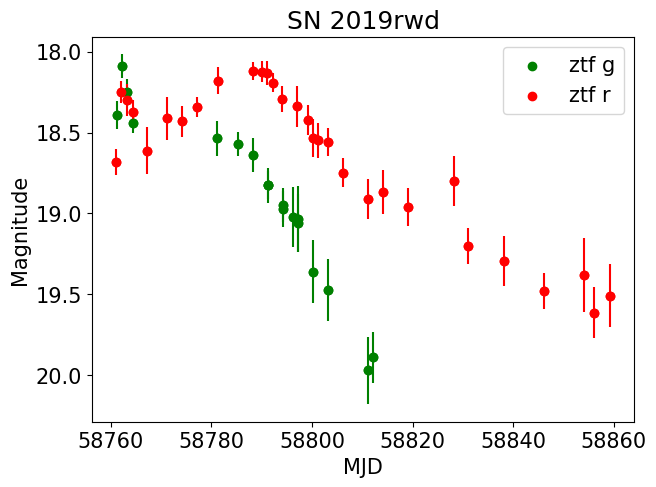

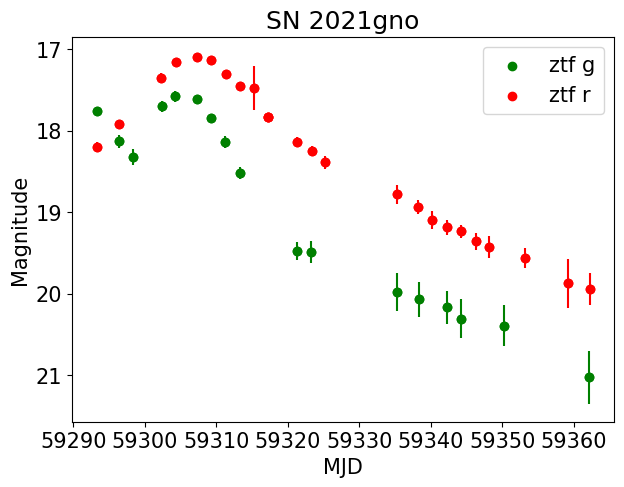

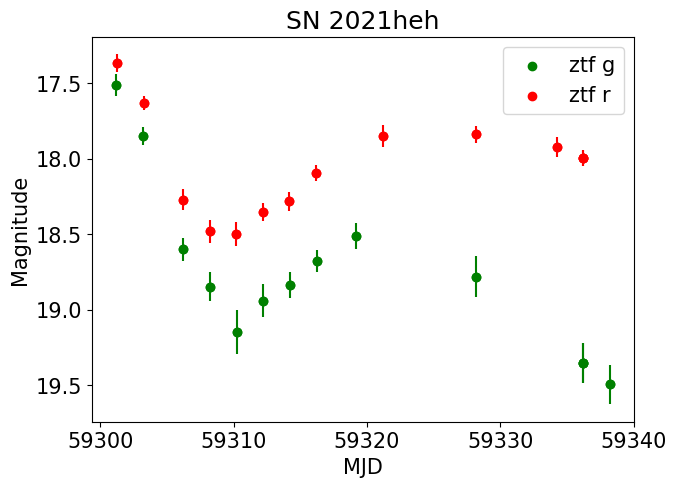

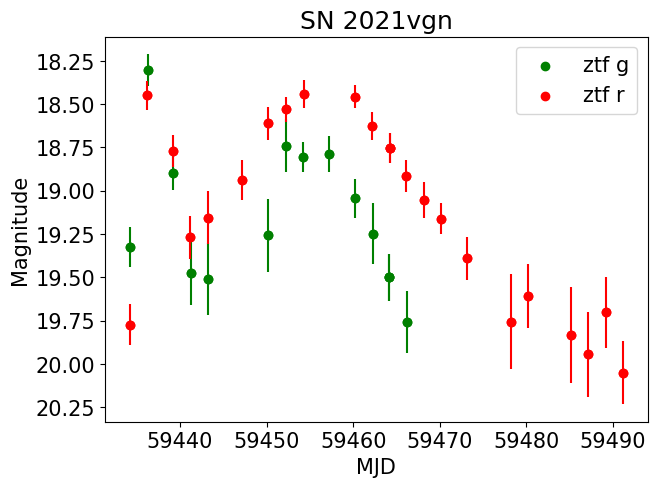

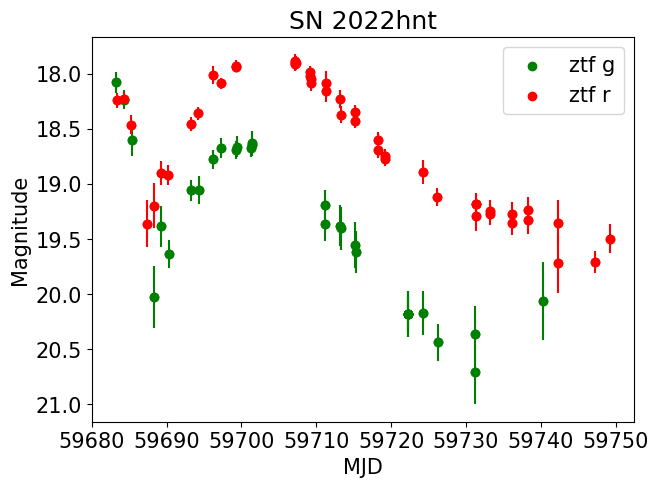

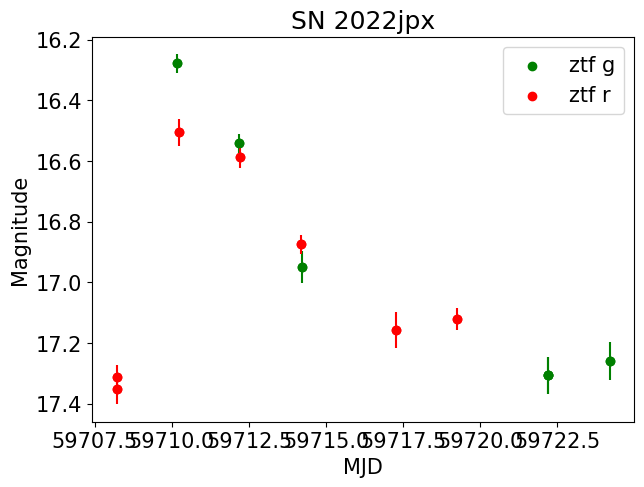

In [4]:
sn_df_list = [sn19rwd, sn21gno, sn21heh, sn21vgn, sn22hnt, sn22jpx]
sn_df_non_list = [sn19rwd_non, sn21gno_non, sn21heh_non, sn21vgn_non, sn22hnt_non, sn22jpx_non]
sn_ids = ['SN 2019rwd','SN 2021gno','SN 2021heh','SN 2021vgn','SN 2022hnt','SN 2022jpx']

for i,df in enumerate(sn_df_list):
    df_non = sn_df_non_list[i]
    plot_LC(df,df_non,ID=sn_ids[i])

In [5]:
# #by eye selection of points in LC that make up first fall (indexing 0)

# #sn19rwd: g:[1,2,3], r:[1,2,3,4]
# #sn21gno: g:[0,1,2], r:[]
# #sn21heh: g:[0,1,2,3,4], r:[0,1,2,3]
# #sn21vgn: g:[1,2,3,4], r:[1,2,3]
# #sn22hnt: g:[0,1,2,3], r:[0?,1,2,3]
# #sn22jpx: g:[0,1,2,3], r:[2,3,4,5]

# sn19rwd_gfall, sn19rwd_rfall = sn19rwd[sn19rwd['fid']==1][1:4], sn19rwd[sn19rwd['fid']==2][1:5]
# sn21gno_gfall, sn21gno_rfall = sn21gno[sn21gno['fid']==1][0:3], _
# sn21heh_gfall, sn21heh_rfall = sn21heh[sn21heh['fid']==1][0:5], sn21heh[sn21heh['fid']==2][0:4]
# sn21vgn_gfall, sn21vgn_rfall = sn21vgn[sn21vgn['fid']==1][1:5], sn21vgn[sn21vgn['fid']==2][1:4]
# sn22hnt_gfall, sn22hnt_rfall = sn22hnt[sn22hnt['fid']==1][0:4], sn22hnt[sn22hnt['fid']==2][0:4]
# sn22jpx_gfall, sn22jpx_rfall = sn22jpx[sn22jpx['fid']==1][0:4], sn22jpx[sn22jpx['fid']==2][2:6]

In [6]:
# #let's normalize (and whiten) the lightcurves to peak (a1)
# #peak magnitude = 1
# #max of first peak => t=0

# def norm_LC_a1(df, gfall, rfall, missing_rfall=False):
#     """
#     input: 
#         df = SN df from read in
#         gfall = df containing 1st falling points in g band
#         rfall = df containing 1st falling points in r band
#         missing_rfall=False, only True for 2021gno 
#     output:
#         norm_sn_g, norm_sn_r = [time_g_band, mag_g_band], [time_r_band, mag_r_band]
#         ^^ 2, 2D arrays containing normalized time and magnitude (normed to first peak, [t0, m0])
#     """
#     if missing_rfall:
#         #g band normalization
#         p_g = [np.array(gfall.mjd)[0], np.array(gfall.magpsf)[0]] #1st peak in g band: [time, mag]
#         norm_t_g = (df[df['fid']==1].mjd - p_g[0])+3                 #normalized time in g band
#         norm_m_g = df[df['fid']==1].magpsf - p_g[1]               #normalized mag in g band
#         norm_sn_g = [norm_t_g, norm_m_g]
#         if len(norm_t_g) != len(norm_m_g):
#             print('ERR: uneven time and mag arrays [g band]')
#         else:
#             return norm_sn_g, _
#     else:
#         #g band normalization
#         p_g = [np.array(gfall.mjd)[0], np.array(gfall.magpsf)[0]] #1st peak in g band: [time, mag]
#         norm_t_g = (df[df['fid']==1].mjd - p_g[0])+3                 #normalized time in g band
#         norm_m_g = (df[df['fid']==1].magpsf - p_g[1])              #normalized mag in g band
#         norm_sn_g = [norm_t_g, norm_m_g]
        
#         #r band normalization
#         p_r = [np.array(rfall.mjd)[0], np.array(rfall.magpsf)[0]] #1st peak in g band: [time, mag]
#         norm_t_r = (df[df['fid']==2].mjd - p_r[0])+3                 #normalized time in g band
#         norm_m_r = (df[df['fid']==2].magpsf - p_r[1])              #normalized mag in g band
#         norm_sn_r = [norm_t_r, norm_m_r]
        
#         if len(norm_t_g) != len(norm_m_g):
#             print('ERR: uneven time and mag arrays [g band]')
#         elif len(norm_t_r) != len(norm_m_r):
#             print('ERR: uneven time and mag arrays [r band]')
#         else:
#             return norm_sn_g, norm_sn_r

In [7]:
# #actually normalizing the LCs to a1
# norm_sn19rwd_g, norm_sn19rwd_r = norm_LC_a1(sn19rwd, sn19rwd_gfall, sn19rwd_rfall)
# norm_sn21gno_g, norm_sn21gno_r = norm_LC_a1(sn21gno, sn21gno_gfall, sn21gno_rfall, missing_rfall=True)
# norm_sn21heh_g, norm_sn21heh_r = norm_LC_a1(sn21heh, sn21heh_gfall, sn21heh_rfall)
# norm_sn21vgn_g, norm_sn21vgn_r = norm_LC_a1(sn21vgn, sn21vgn_gfall, sn21vgn_rfall)
# norm_sn22hnt_g, norm_sn22hnt_r = norm_LC_a1(sn22hnt, sn22hnt_gfall, sn22hnt_rfall)
# norm_sn22jpx_g, norm_sn22jpx_r = norm_LC_a1(sn22jpx, sn22jpx_gfall, sn22jpx_rfall)

In [8]:
# # PLOTTING NORMALIZED OFFSET LCs (a1 version)
# norm_g_all = [norm_sn19rwd_g,norm_sn21gno_g,norm_sn21heh_g,norm_sn21vgn_g,norm_sn22hnt_g,norm_sn22jpx_g]
# norm_r_all = [norm_sn19rwd_r,norm_sn21gno_r,norm_sn21heh_r,norm_sn21vgn_r,norm_sn22hnt_r,norm_sn22jpx_r]
# offsets = [0,1,2,3,4,5]
# colors=['red', 'darkorange', 'gold', 'green', 'blue', 'purple']

# #making plot of g band
# plt.figure(figsize=(8,6))
# for i,sn in enumerate(norm_g_all):
#     plt.scatter(sn[0], sn[1]+offsets[i], facecolors='None', edgecolors=colors[i], s=100, alpha=0.6, label=sn_ids[i]+'+'+str(offsets[i])) # normalized points
#     df = sn_df_list[i]
#     plt.errorbar(sn[0], sn[1]+offsets[i],df[df['fid']==1].sigmapsf, c=colors[i], linestyle='--', alpha=0.3, label='')
    
# plt.axvline(3, linestyle='-', color='lightgray', zorder=0)
# plt.title('Normalized ZTF g-band LC\'s')
# plt.xlabel('Normalized Time [days]')
# plt.ylabel('[offset] Normalized Magnitude')
# plt.legend()
# plt.xlim(0, 70)
# # plt.ylim(-1.5, 2.5)
# plt.gca().invert_yaxis()
# plt.savefig('./figures/normalized_LCs_a1_g_offset.png')


# #mkaing plot of r band
# plt.figure(figsize=(8,6))
# for i,sn in enumerate(norm_r_all):
#     if type(sn) != str:
#         plt.scatter(sn[0], sn[1]+offsets[i], facecolors='none', edgecolors=colors[i], s=100, alpha=0.6, label=sn_ids[i]+'+'+str(offsets[i])) # normalized points
#         df = sn_df_list[i]
#         plt.errorbar(sn[0], sn[1]+offsets[i], df[df['fid']==2].sigmapsf, c=colors[i], linestyle='--', alpha=0.3, label='')
    
# plt.axvline(3, linestyle='-', color='lightgray', zorder=0)
# plt.title('Normalized ZTF r-band LC\'s')
# plt.xlabel('Normalized Time [days]')
# plt.ylabel('[offset] Normalized Magnitude')
# plt.legend()
# plt.xlim(0, 70)
# # plt.ylim(-1.5, 2.5)
# plt.gca().invert_yaxis()
# plt.savefig('./figures/normalized_LCs_a1_r_offset.png')

In [9]:
#defining troughs (a2 param in mcmc) [g,r] for each sn

sn19rwd_a2 = [3, 4]
sn21gno_a2 = [2, 0]
sn21heh_a2 = [4, 3]
sn21vgn_a2 = [4, 3]
sn22hnt_a2 = [3, 3]
sn22jpx_a2 = [3, 5]

In [10]:
#normalizing to trough (a2)
#let's normalize (and whiten) the lightcurves to peak (a1)
#peak magnitude = 1
#max of first peak => t=0

def norm_LC_a2(df, a2=[0,0]):
    """
    input: 
        df = SN df from read in
        a2 = list of data points in form of [g_band_trough, r_band_trough]
    output:
        norm_sn_g, norm_sn_r = [time_g_band, mag_g_band], [time_r_band, mag_r_band]
        ^^ 2, 2D arrays containing normalized time and magnitude (normed to first trough, [t0, m0])
    """
    #g band normalization
    a2_g_t = np.array(df[df['fid']==1].mjd)[a2[0]]    #time
    a2_g_m = np.array(df[df['fid']==1].magpsf)[a2[0]] #mag

    norm_t_g = (df[df['fid']==1].mjd - a2_g_t)+15               #normalized time in g band
    norm_m_g = (df[df['fid']==1].magpsf - a2_g_m)              #normalized mag in g band
    norm_sn_g = [norm_t_g, norm_m_g]

    #r band normalization
    a2_r_t = np.array(df[df['fid']==2].mjd)[a2[1]]    #time
    a2_r_m = np.array(df[df['fid']==2].magpsf)[a2[1]] #mag   
    
    norm_t_r = (df[df['fid']==2].mjd - a2_r_t)+15               #normalized time in g band
    norm_m_r = (df[df['fid']==2].magpsf - a2_r_m)              #normalized mag in g band
    norm_sn_r = [norm_t_r, norm_m_r]

    if len(norm_t_g) != len(norm_m_g):
        print('ERR: uneven time and mag arrays [g band]')
    elif len(norm_t_r) != len(norm_m_r):
        print('ERR: uneven time and mag arrays [r band]')
    else:
        return norm_sn_g, norm_sn_r

In [11]:
#actually normalizing the LCs to a1
norm_sn19rwd_g_a2, norm_sn19rwd_r_a2 = norm_LC_a2(sn19rwd, sn19rwd_a2)
norm_sn21gno_g_a2, norm_sn21gno_r_a2 = norm_LC_a2(sn21gno, sn21gno_a2)
norm_sn21heh_g_a2, norm_sn21heh_r_a2 = norm_LC_a2(sn21heh, sn21heh_a2)
norm_sn21vgn_g_a2, norm_sn21vgn_r_a2 = norm_LC_a2(sn21vgn, sn21vgn_a2)
norm_sn22hnt_g_a2, norm_sn22hnt_r_a2 = norm_LC_a2(sn22hnt, sn22hnt_a2)
norm_sn22jpx_g_a2, norm_sn22jpx_r_a2 = norm_LC_a2(sn22jpx, sn22jpx_a2)

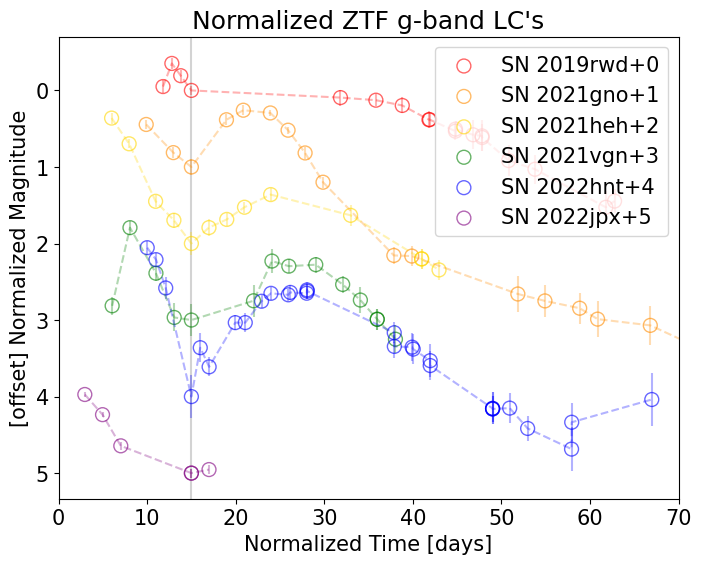

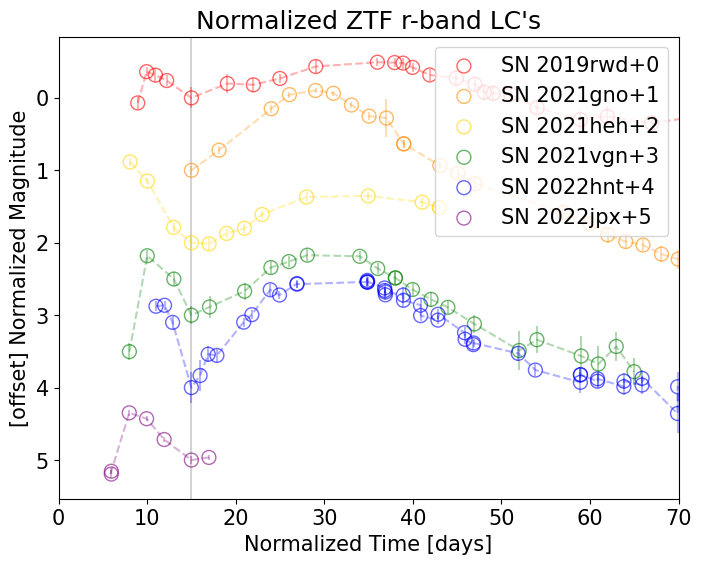

In [12]:
# PLOTTING NORMALIZED OFFSET LCs (a2 version)
norm_g_all_a2 = [norm_sn19rwd_g_a2,norm_sn21gno_g_a2,norm_sn21heh_g_a2,norm_sn21vgn_g_a2,norm_sn22hnt_g_a2,norm_sn22jpx_g_a2]
norm_r_all_a2 = [norm_sn19rwd_r_a2,norm_sn21gno_r_a2,norm_sn21heh_r_a2,norm_sn21vgn_r_a2,norm_sn22hnt_r_a2,norm_sn22jpx_r_a2]
offsets = [0,1,2,3,4,5]
colors=['red', 'darkorange', 'gold', 'green', 'blue', 'purple']

#making plot of g band
plt.figure(figsize=(8,6))
for i,sn in enumerate(norm_g_all_a2):
    plt.scatter(sn[0], sn[1]+offsets[i], facecolors='None', edgecolors=colors[i], s=100, alpha=0.6, label=sn_ids[i]+'+'+str(offsets[i])) # normalized points
    df = sn_df_list[i]
    plt.errorbar(sn[0], sn[1]+offsets[i],df[df['fid']==1].sigmapsf, c=colors[i], linestyle='--', alpha=0.3, label='')
    
plt.axvline(15, linestyle='-', color='lightgray', zorder=0)
plt.title('Normalized ZTF g-band LC\'s')
plt.xlabel('Normalized Time [days]')
plt.ylabel('[offset] Normalized Magnitude')
plt.legend()
plt.xlim(0, 70)
# plt.ylim(-1.5, 2.5)
plt.gca().invert_yaxis()
plt.savefig('./figures/normalized_LCs_a2_g_offset.png')


#mkaing plot of r band
plt.figure(figsize=(8,6))
for i,sn in enumerate(norm_r_all_a2):
    if type(sn) != str:
        plt.scatter(sn[0], sn[1]+offsets[i], facecolors='none', edgecolors=colors[i], s=100, alpha=0.6, label=sn_ids[i]+'+'+str(offsets[i])) # normalized points
        df = sn_df_list[i]
        plt.errorbar(sn[0], sn[1]+offsets[i], df[df['fid']==2].sigmapsf, c=colors[i], linestyle='--', alpha=0.3, label='')
    
plt.axvline(15, linestyle='-', color='lightgray', zorder=0)
plt.title('Normalized ZTF r-band LC\'s')
plt.xlabel('Normalized Time [days]')
plt.ylabel('[offset] Normalized Magnitude')
plt.legend(loc='upper right')
plt.xlim(0, 70)
# plt.ylim(-1.5, 2.5)
plt.gca().invert_yaxis()
plt.savefig('./figures/normalized_LCs_a2_r_offset.png')

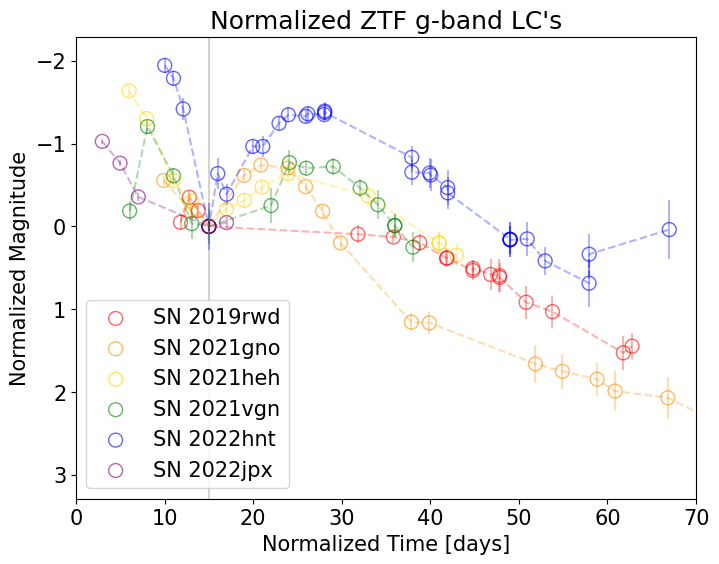

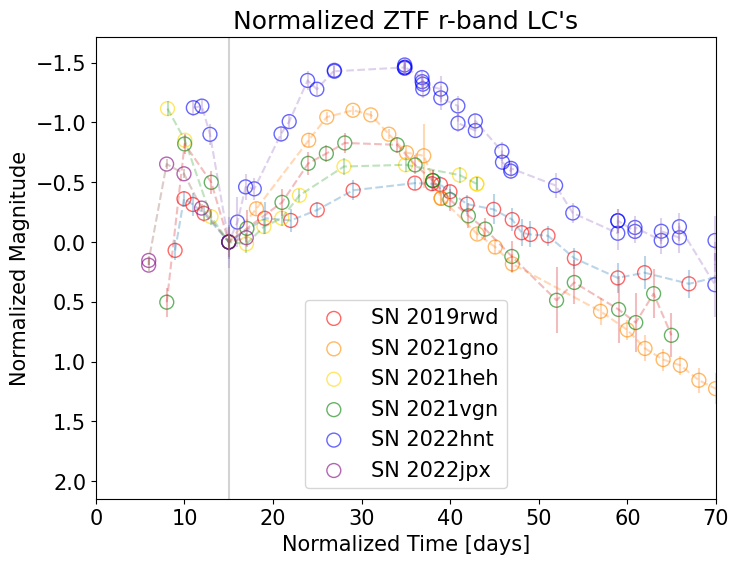

In [79]:
#NON OFFSET NORMALIZED PLOT

#making plot of g band
plt.figure(figsize=(8,6))
for i,sn in enumerate(norm_g_all_a2):
    plt.scatter(sn[0], sn[1], label=sn_ids[i], facecolors='None', edgecolors=colors[i], s=100, alpha=0.6,) # normalized points
    df = sn_df_list[i]
    plt.errorbar(sn[0], sn[1], df[df['fid']==1].sigmapsf, c=colors[i], linestyle='--', alpha=0.3, label='')
    
plt.axvline(15, linestyle='-', color='lightgray', zorder=0)
plt.title('Normalized ZTF g-band LC\'s')
plt.xlabel('Normalized Time [days]')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.xlim(0, 70)
# plt.ylim(-1.5, 2.5)
plt.gca().invert_yaxis()
plt.savefig('./figures/normalized_a2_LCs_g.png')

#mkaing plot of r band
plt.figure(figsize=(8,6))
for i,sn in enumerate(norm_r_all_a2):
    if type(sn) != str:
        plt.scatter(sn[0], sn[1], label=sn_ids[i], facecolors='None', edgecolors=colors[i], s=100, alpha=0.6,) # normalized points
        df = sn_df_list[i]
        plt.errorbar(sn[0], sn[1], df[df['fid']==2].sigmapsf, linestyle='--', alpha=0.3, label='')
    
plt.axvline(15, linestyle='-', color='lightgray', zorder=0)
plt.title('Normalized ZTF r-band LC\'s')
plt.xlabel('Normalized Time [days]')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.xlim(0, 70)
# plt.ylim(-1.5, 2.5)
plt.gca().invert_yaxis()
plt.savefig('./figures/normalized_a2_LCs_r.png')

In [14]:
#manual selection of first rise, first fall, second rise

#FIRST RISE
#sn19rwd: g:[0,1], r:[0,1]
#sn21gno: N/A, N/A
#sn21heh: N/A, N/A
#sn21vgn: g:[0,1], r:[0,1]
#sn22hnt: N/A, N/A
#sn22jpx: N/A, r:[0,2]

#FIRST FALL
#sn19rwd: g:[1,2,3], r:[1,2,3,4]
#sn21gno: g:[0,1,2], r:N/A
#sn21heh: g:[0,1,2,3,4], r:[0,1,2,3]
#sn21vgn: g:[1,2,3,4], r:[1,2,3]
#sn22hnt: g:[0,1,2,3], r:[0,1,2,3]
#sn22jpx: g:[0,1,2,3], r:[2,3,4,5]

#SECOND RISE (limited by first rise time in days) (if no first rise, then 2 points)
#sn19rwd: g:[3,4], r:[4,5]
#sn21gno: g:[2,3], r:[0,1]
#sn21heh: g:[4,5], r:[3,4]
#sn21vgn: g:[4,5], r:[3,4]
#sn22hnt: g:[3,4], r:[3,4]
#sn22jpx: g:[3,4], r:[5,6]

In [15]:
# #defining lines/liklihoods to be called in MCMC fitting
# def model(theta):
#     m, b, log_f = theta
#     model = m*x + b
#     return model

# def log_likelihood(theta, x, y, yerr):
#     m, b, log_f = theta
#     model = m * x + b
#     sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
#     return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

# def log_prior_rise(theta): #for first/second rise
#     m, b, log_f = theta
#     if -5.0 < m < 0.0 and 0.0 < b < 10.0 and -10.0 < log_f < 5.0:
#         return 0.0
#     return -np.inf

# def log_prior_fall(theta): #for first fall
#     m, b, log_f = theta
#     if 0.0 < m < 5.0 and -10.0 < b < 0.0 and -10.0 < log_f < 5.0:
#         return 0.0
#     return -np.inf

# def log_probability_rise(theta, x, y, yerr):
#     lp = log_prior_rise(theta)
#     if not np.isfinite(lp):
#         return -np.inf
#     return lp + log_likelihood(theta, x, y, yerr)

# def log_probability_fall(theta, x, y, yerr):
#     lp = log_prior_fall(theta)
#     if not np.isfinite(lp):
#         return -np.inf
#     return lp + log_likelihood(theta, x, y, yerr)

In [16]:
# x = norm_sn19rwd_g[0][0:2]
# y = norm_sn19rwd_g[1][0:2]
# yerr = np.array(sn19rwd[sn19rwd['fid']==1].sigmapsf)[0:2]

# #"minimizing" the log_liklihood function to find better initial guesses for MCMC fitting
# np.random.seed(42)
# nll = lambda *args: -log_likelihood(*args)
# initial = np.array([0.25, 2.0, np.log(0.5)]) + 0.1 * np.random.randn(3)
# soln = minimize(nll, initial, args=(x, y, yerr))
# m_ml, b_ml, log_f_ml = soln.x

# #setting MCMC search params
# pos = soln.x + 1e-4 * np.random.randn(32, 3)
# nwalkers, ndim = pos.shape

# #actually doing MCMC
# sampler = emcee.EnsembleSampler(
#     nwalkers, ndim, log_probability_rise, args=(x, y, yerr)
# )
# sampler.run_mcmc(pos, 5000, progress=True);

In [17]:
# flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

# mcmc_results =[]
# #retrieve the 16th/50th/84th percentile for m,b,log_f and the lower/upper bounds on each
# for i in range(ndim):
#     mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
#     q = np.diff(mcmc)
#     arr = [mcmc[1], q[0], q[1]]
#     mcmc_results.append(arr)
# #     txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
# #     txt = txt.format(mcmc[1], q[0], q[1], labels[i])
# #     display(Math(txt))
# print(np.shape(mcmc_results))

# #draw best fit line on plot
# new_theta_max  = sampler.flatchain[np.argmax(sampler.flatlnprobability)]
# new_best_fit_model = model(new_theta_max)
# # plt.plot(x,new_best_fit_model,label='Highest Likelihood Model')

In [18]:
# # input: x, y, yerr, [m0,b0,logf0], rise/fall, 
# # output: [[m,ml,mu],[b,bl,bu],[logf,logfl,logfu]], best_fit_model[N,2]

# def mcmc_fit(x, y, yerr, p0=[1,0,1], rise=True):
#     #"minimizing" the log_liklihood function to find better initial guesses for MCMC fitting
#     np.random.seed(42)
#     nll = lambda *args: -log_likelihood(*args)
#     initial = np.array([p0[0], p0[1], np.log(p0[2])]) + 0.1 * np.random.randn(3)
#     soln = minimize(nll, initial, args=(x, y, yerr))
#     m_ml, b_ml, _ = soln.x
#     log_f_ml=-2
#     new_soln = np.array([m_ml, b_ml, log_f_ml])
    
#     #setting MCMC search params
#     pos = new_soln + 1e-4 * np.random.randn(32, 3)
#     nwalkers, ndim = pos.shape

#     #actually doing MCMC
#     if rise:
#         sampler = emcee.EnsembleSampler(
#             nwalkers, ndim, log_probability_rise, args=(x, y, yerr)
#         )
#         sampler.run_mcmc(pos, 2000, progress=True);
#     if not rise:
#         sampler = emcee.EnsembleSampler(
#             nwalkers, ndim, log_probability_fall, args=(x, y, yerr)
#         )
#         sampler.run_mcmc(pos, 2000, progress=True);
    
#     flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

#     mcmc_results =[]
#     #retrieve the 16th/50th/84th percentile for m,b,log_f and the lower/upper bounds on each
#     for i in range(ndim):
#         mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
#         q = np.diff(mcmc)
#         arr = [mcmc[1], q[0], q[1]]
#         mcmc_results.append(arr)
        
# #     #draw best fit line on plot
# #     best_theta_max  = sampler.flatchain[np.argmax(sampler.flatlnprobability)]
# #     best_fit_model = model(best_theta_max)
    
#     return mcmc_results, sampler

In [19]:
# # INDIVIDUAL FITS

# #first rise fits, g-band
# mcmc_19rwd_g_r1,_ = mcmc_fit(norm_sn19rwd_g[0][0:2], norm_sn19rwd_g[1][0:2], np.array(sn19rwd[sn19rwd['fid']==1].sigmapsf)[0:2], [-0.25, 2.0, 0.5])
# mcmc_21vgn_g_r1,test = mcmc_fit(norm_sn21vgn_g[0][0:2], norm_sn21vgn_g[1][0:2], np.array(sn21vgn[sn21vgn['fid']==1].sigmapsf)[0:2], [-0.25, 2.0, 0.5])
# #first rise fits, r-band
# mcmc_19rwd_r_r1,_ = mcmc_fit(norm_sn19rwd_r[0][0:2], norm_sn19rwd_r[1][0:2], np.array(sn19rwd[sn19rwd['fid']==2].sigmapsf)[0:2], [-0.25, 2.0, 0.5])
# mcmc_21vgn_r_r1,_ = mcmc_fit(norm_sn21vgn_r[0][0:2], norm_sn21vgn_r[1][0:2], np.array(sn21vgn[sn21vgn['fid']==2].sigmapsf)[0:2], [-0.25, 2.0, 0.5])
# mcmc_22jpx_r_r1,_ = mcmc_fit(norm_sn22jpx_r[0][0:3], norm_sn22jpx_r[1][0:3], np.array(sn22jpx[sn22jpx['fid']==2].sigmapsf)[0:3], [-0.25, 2.0, 0.5])

In [20]:
# fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
# samples = sample_test.get_chain()
# labels = ["m", "b", "log(f)"]
# for i in range(3):
#     ax = axes[i]
#     ax.plot(samples[:, :, i], "k", alpha=0.3)
#     ax.set_xlim(0, len(samples))
#     ax.set_ylabel(labels[i])
#     ax.yaxis.set_label_coords(-0.1, 0.5)

# axes[-1].set_xlabel("step number");

In [21]:
# flat_samples = sample_test.get_chain(discard=100, thin=15, flat=True)
# print(flat_samples.shape)

# fig = corner.corner(
#     flat_samples, labels=labels
# );

# print(mcmc_19rwd_g_r1)

In [22]:
# # INDIVIDUAL FITS

# #first fall fits, g-band
# mcmc_19rwd_g_f1,_ = mcmc_fit(norm_sn19rwd_g[0][1:4], norm_sn19rwd_g[1][1:4], np.array(sn19rwd[sn19rwd['fid']==1].sigmapsf)[1:4], [0.25, -2.0, 0.5], rise=False)
# mcmc_21gno_g_f1,_ = mcmc_fit(norm_sn21gno_g[0][0:3], norm_sn21gno_g[1][0:3], np.array(sn21gno[sn21gno['fid']==1].sigmapsf)[0:3], [0.25, -2.0, 0.5], rise=False)
# mcmc_21heh_g_f1,_ = mcmc_fit(norm_sn21heh_g[0][0:5], norm_sn21heh_g[1][0:5], np.array(sn21heh[sn21heh['fid']==1].sigmapsf)[0:5], [0.25, -2.0, 0.5], rise=False)
# mcmc_21vgn_g_f1,_ = mcmc_fit(norm_sn21vgn_g[0][1:5], norm_sn21vgn_g[1][1:5], np.array(sn21vgn[sn21vgn['fid']==1].sigmapsf)[1:5], [0.25, -2.0, 0.5], rise=False)
# mcmc_22hnt_g_f1,_ = mcmc_fit(norm_sn22hnt_g[0][0:4], norm_sn22hnt_g[1][0:4], np.array(sn22hnt[sn22hnt['fid']==1].sigmapsf)[0:4], [0.25, -2.0, 0.5], rise=False)
# mcmc_22jpx_g_f1,_ = mcmc_fit(norm_sn22jpx_g[0][0:4], norm_sn22jpx_g[1][0:4], np.array(sn22jpx[sn22jpx['fid']==1].sigmapsf)[0:4], [0.25, -2.0, 0.5], rise=False)

# #first fall fits, r-band
# mcmc_19rwd_r_f1,_ = mcmc_fit(norm_sn19rwd_r[0][1:5], norm_sn19rwd_r[1][1:5], np.array(sn19rwd[sn19rwd['fid']==2].sigmapsf)[1:5], [0.25, -2.0, 0.5], rise=False)
# #2021gno no r fall
# mcmc_21heh_r_f1,_ = mcmc_fit(norm_sn21heh_r[0][0:4], norm_sn21heh_r[1][0:4], np.array(sn21heh[sn21heh['fid']==2].sigmapsf)[0:4], [0.25, -2.0, 0.5], rise=False)
# mcmc_21vgn_r_f1,_ = mcmc_fit(norm_sn21vgn_r[0][1:4], norm_sn21vgn_r[1][1:4], np.array(sn21vgn[sn21vgn['fid']==2].sigmapsf)[1:4], [0.25, -2.0, 0.5], rise=False)
# mcmc_22hnt_r_f1,_ = mcmc_fit(norm_sn22hnt_r[0][0:4], norm_sn22hnt_r[1][0:4], np.array(sn22hnt[sn22hnt['fid']==2].sigmapsf)[0:4], [0.25, -2.0, 0.5], rise=False)
# mcmc_22jpx_r_f1,_ = mcmc_fit(norm_sn22jpx_r[0][2:6], norm_sn22jpx_r[1][2:6], np.array(sn22jpx[sn22jpx['fid']==2].sigmapsf)[2:6], [0.25, -2.0, 0.5], rise=False)

In [23]:
# # INDIVIDUAL FITS

# #2nd rise fits, gband
# mcmc_19rwd_g_r2,_ = mcmc_fit(norm_sn19rwd_g[0][3:5], norm_sn19rwd_g[1][3:5], np.array(sn19rwd[sn19rwd['fid']==1].sigmapsf)[3:5], [-0.25, 2.0, 0.5])
# mcmc_21gno_g_r2,_ = mcmc_fit(norm_sn21gno_g[0][2:4], norm_sn21gno_g[1][2:4], np.array(sn21gno[sn21gno['fid']==1].sigmapsf)[2:4], [-0.25, 2.0, 0.5])
# mcmc_21heh_g_r2,_ = mcmc_fit(norm_sn21heh_g[0][4:6], norm_sn21heh_g[1][4:6], np.array(sn21heh[sn21heh['fid']==1].sigmapsf)[4:6], [-0.25, 2.0, 0.5])
# mcmc_21vgn_g_r2,_ = mcmc_fit(norm_sn21vgn_g[0][4:6], norm_sn21vgn_g[1][4:6], np.array(sn21vgn[sn21vgn['fid']==1].sigmapsf)[4:6], [-0.25, 2.0, 0.5])
# mcmc_22hnt_g_r2,_ = mcmc_fit(norm_sn22hnt_g[0][3:5], norm_sn22hnt_g[1][3:5], np.array(sn22hnt[sn22hnt['fid']==1].sigmapsf)[3:5], [-0.25, 2.0, 0.5])
# mcmc_22jpx_g_r2,_ = mcmc_fit(norm_sn22jpx_g[0][3:5], norm_sn22jpx_g[1][3:5], np.array(sn22jpx[sn22jpx['fid']==1].sigmapsf)[3:5], [-0.25, 2.0, 0.5])

# #2nd rise fits, rband
# mcmc_19rwd_r_r2,_ = mcmc_fit(norm_sn19rwd_r[0][4:6], norm_sn19rwd_r[1][4:6], np.array(sn19rwd[sn19rwd['fid']==2].sigmapsf)[4:6], [-0.25, 2.0, 0.5])
# #ignoring 21gno b/c not normalized rn
# mcmc_21heh_r_r2,_ = mcmc_fit(norm_sn21heh_r[0][3:5], norm_sn21heh_r[1][3:5], np.array(sn21heh[sn21heh['fid']==2].sigmapsf)[3:5], [-0.25, 2.0, 0.5])
# mcmc_21vgn_r_r2,_ = mcmc_fit(norm_sn21vgn_r[0][3:5], norm_sn21vgn_r[1][3:5], np.array(sn21vgn[sn21vgn['fid']==2].sigmapsf)[3:5], [-0.25, 2.0, 0.5])
# mcmc_22hnt_r_r2,_ = mcmc_fit(norm_sn22hnt_r[0][3:5], norm_sn22hnt_r[1][3:5], np.array(sn22hnt[sn22hnt['fid']==2].sigmapsf)[3:5], [-0.25, 2.0, 0.5])
# mcmc_22jpx_r_r2,_ = mcmc_fit(norm_sn22jpx_r[0][5:8], norm_sn22jpx_r[1][5:8], np.array(sn22jpx[sn22jpx['fid']==2].sigmapsf)[5:8], [-0.25, 2.0, 0.5])

In [24]:
# def line(x,m,b):
#     return m*x +b

# colors=['blue', 'orange', 'green', 'red', 'purple', 'brown']

# def plot_individ_mcmc(norm_sn, mcmc_r1, mcmc_f1, mcmc_r2, r1_range=(0,2), f1_range=(2,4), r2_range=(4,10), 
#                       name='sn', band='g', color='blue', r1=False, f1=True, r2=True):
#     if r1:
#         plt.plot(norm_sn[0][r1_range[0]:r1_range[1]], line(norm_sn[0][r1_range[0]:r1_range[1]], mcmc_r1[0][0], mcmc_r1[1][0]), label='', color=color, alpha=0.8)
#     if f1:
#         plt.plot(norm_sn[0][f1_range[0]:f1_range[1]], line(norm_sn[0][f1_range[0]:f1_range[1]], mcmc_f1[0][0], mcmc_f1[1][0]), linestyle='--', label='', color=color, alpha=0.8)
#     if r2:
#         plt.plot(norm_sn[0][r2_range[0]:r2_range[1]], line(norm_sn[0][r2_range[0]:r2_range[1]], mcmc_r2[0][0], mcmc_r2[1][0]), linestyle='dotted', label='', color=color, alpha=0.8)

#     plt.scatter(norm_sn[0], norm_sn[1], label=name+' ('+band+')', color=color, alpha=0.3)
    
#     plt.axvline(3, linestyle='-', color='lightgray', zorder=0)
#     plt.xlabel('Normalized Time [days]')
#     plt.ylabel('Normalized Magnitude')
#     plt.legend()
#     plt.xlim(0, 30)
#     plt.gca().invert_yaxis()
#     return 
    
# # gband individ mcmc plot
# plt.figure(figsize=(7,5))
# plt.title('Normalized ZTF g-band LC\'s- First Peak')  
# plot_individ_mcmc(norm_sn19rwd_g, mcmc_19rwd_g_r1, mcmc_19rwd_g_f1, mcmc_19rwd_g_r2, r1_range=(0,2), f1_range=(1,4), r2_range=(3,5), 
#                   name='19rwd', band='g', color=colors[0], r1=True, f1=True)
# plot_individ_mcmc(norm_sn21gno_g, _, mcmc_21gno_g_f1, mcmc_21gno_g_r2, r1_range=(0,0), f1_range=(0,3), r2_range=(2,4),
#                   name='21gno', band='g', color=colors[1], r1=False, f1=True)
# plot_individ_mcmc(norm_sn21heh_g, _, mcmc_21heh_g_f1, mcmc_21heh_g_r2, r1_range=(0,0), f1_range=(0,5), r2_range=(4,6),
#                   name='21heh', band='g', color=colors[2], r1=False, f1=True)
# plot_individ_mcmc(norm_sn21vgn_g, mcmc_21vgn_g_r1, mcmc_21vgn_g_f1, mcmc_21vgn_g_r2, r1_range=(0,2), f1_range=(1,5), r2_range=(4,6),
#                   name='21vgn', band='g', color=colors[3], r1=True, f1=True)
# plot_individ_mcmc(norm_sn22hnt_g, _, mcmc_22hnt_g_f1, mcmc_22hnt_g_r2, r1_range=(0,0), f1_range=(0,4), r2_range=(3,5),
#                   name='22hnt', band='g', color=colors[4], r1=False, f1=True)
# plot_individ_mcmc(norm_sn22jpx_g, _, mcmc_22jpx_g_f1, mcmc_22jpx_g_r2, r1_range=(0,0), f1_range=(0,4), r2_range=(3,5),
#                   name='22jpx', band='g', color=colors[5], r1=False, f1=True)
# plt.gca().invert_yaxis()
# plt.savefig('./figures/mcmc_individ_g_r1f1.png')


# # rband individ mcmc plot
# plt.figure(figsize=(7,5))
# plt.title('Normalized ZTF r-band LC\'s- First Peak')
# plot_individ_mcmc(norm_sn19rwd_r, mcmc_19rwd_r_r1, mcmc_19rwd_r_f1, mcmc_19rwd_r_r2, r1_range=(0,2), f1_range=(1,5),  r2_range=(4,6),
#                   name='19rwd', band='r', color=colors[0], r1=True, f1=True)
# #no 21gno yet
# plot_individ_mcmc(norm_sn21heh_r, _, mcmc_21heh_r_f1, mcmc_21heh_r_r2, r1_range=(0,0), f1_range=(0,4),  r2_range=(3,5),
#                   name='21heh', band='r', color=colors[2], r1=False, f1=True)
# plot_individ_mcmc(norm_sn21vgn_r, mcmc_21vgn_r_r1, mcmc_21vgn_r_f1, mcmc_21vgn_r_r2, r1_range=(0,2), f1_range=(1,4),  r2_range=(3,5),
#                   name='21vgn', band='r', color=colors[3], r1=True, f1=True)
# plot_individ_mcmc(norm_sn22hnt_r, _, mcmc_22hnt_r_f1, mcmc_22hnt_r_r2, r1_range=(0,0), f1_range=(0,4),  r2_range=(3,5),
#                   name='22hnt', band='r', color=colors[4], r1=False, f1=True)
# plot_individ_mcmc(norm_sn22jpx_r, mcmc_22jpx_r_r1, mcmc_22jpx_r_f1, mcmc_22jpx_r_r2, r1_range=(0,3), f1_range=(2,6),  r2_range=(5,8),
#                   name='22jpx', band='r', color=colors[5], r1=True, f1=True)
# plt.savefig('./figures/mcmc_individ_r_r1f1.png')

In [25]:
# # COMBINED FITS
# #first rise

# #g band
# r1_g_x = np.array([norm_sn19rwd_g[0][0:2], norm_sn21vgn_g[0][0:2]]).flatten()
# r1_g_y = np.array([norm_sn19rwd_g[1][0:2], norm_sn21vgn_g[1][0:2]]).flatten()
# r1_g_yerr = np.array([np.array(sn19rwd[sn19rwd['fid']==1].sigmapsf)[0:2], np.array(sn21vgn[sn21vgn['fid']==1].sigmapsf)[0:2]]).flatten()
# # print(type(r1_g_x))#, r1_g_y, r1_g_yerr)

# #r band
# r1_r_x = np.array(np.concatenate([norm_sn19rwd_r[0][0:2], norm_sn21vgn_r[0][0:2], norm_sn22jpx_r[0][0:3]]).flat)
# r1_r_y = np.array(np.concatenate([norm_sn19rwd_r[1][0:2], norm_sn21vgn_r[1][0:2], norm_sn22jpx_r[1][0:3]]).flat)
# r1_r_yerr = np.array(np.concatenate([np.array(sn19rwd[sn19rwd['fid']==2].sigmapsf)[0:2], np.array(sn21vgn[sn21vgn['fid']==2].sigmapsf)[0:2], np.array(sn22jpx[sn22jpx['fid']==2].sigmapsf)[0:3]]).flat)
# # print(type(r1_r_x), r1_r_x)#, r1_r_y, r1_r_yerr)

# # #MCMC
# mcmc_all_g_r1,sample_r1_g = mcmc_fit(r1_g_x, r1_g_y, r1_g_yerr, [-0.25, 2.0, 0.5])
# mcmc_all_r_r1,sample_r1_r = mcmc_fit(r1_r_x, r1_r_y, r1_r_yerr, [-0.25, 2.0, 0.5])

In [26]:
# #COMBINED FITS 
# #first fall

# #g-band
# f1_g_x = np.array(np.concatenate([norm_sn19rwd_g[0][1:4], norm_sn21gno_g[0][0:3], norm_sn21heh_g[0][0:5], 
#                                   norm_sn21vgn_g[0][1:5], norm_sn22hnt_g[0][0:4], norm_sn22jpx_g[0][0:4]]).flat)
# f1_g_y = np.array(np.concatenate([norm_sn19rwd_g[1][1:4], norm_sn21gno_g[1][0:3], norm_sn21heh_g[1][0:5], 
#                                   norm_sn21vgn_g[1][1:5], norm_sn22hnt_g[1][0:4], norm_sn22jpx_g[1][0:4]]).flat)
# f1_g_yerr = np.array(np.concatenate([sn19rwd[sn19rwd['fid']==1].sigmapsf[1:4], sn21gno[sn21gno['fid']==1].sigmapsf[0:3], 
#                                      sn21heh[sn21heh['fid']==1].sigmapsf[0:5], sn21vgn[sn21vgn['fid']==1].sigmapsf[1:5], 
#                                      sn22hnt[sn22hnt['fid']==1].sigmapsf[0:4], sn22jpx[sn22jpx['fid']==1].sigmapsf[0:4]]).flat)

# #r-band
# f1_r_x = np.array(np.concatenate([norm_sn19rwd_r[0][1:5], norm_sn21heh_r[0][0:4], norm_sn21vgn_r[0][1:4], 
#                                   norm_sn22hnt_r[0][0:4], norm_sn22jpx_r[0][2:6]]).flat)
# f1_r_y = np.array(np.concatenate([norm_sn19rwd_r[1][1:5], norm_sn21heh_r[1][0:4], norm_sn21vgn_r[1][1:4], 
#                                   norm_sn22hnt_r[1][0:4], norm_sn22jpx_r[1][2:6]]).flat)
# f1_r_yerr = np.array(np.concatenate([sn19rwd[sn19rwd['fid']==2].sigmapsf[1:5], sn21heh[sn21heh['fid']==2].sigmapsf[0:4], 
#                                      sn21vgn[sn21vgn['fid']==2].sigmapsf[1:4], sn22hnt[sn22hnt['fid']==2].sigmapsf[0:4], 
#                                      sn22jpx[sn22jpx['fid']==2].sigmapsf[2:6]]).flat)

# # MCMC
# mcmc_all_g_f1,sample_f1_g = mcmc_fit(f1_g_x, f1_g_y, f1_g_yerr, [0.25, -2.0, 0.5], rise=False)
# mcmc_all_r_f1,sample_f1_r = mcmc_fit(f1_r_x, f1_r_y, f1_r_yerr, [0.25, -2.0, 0.5], rise=False)

In [27]:
# #COMBINED FITS 
# #second rise

# #g-band
# r2_g_x = np.array(np.concatenate([norm_sn19rwd_g[0][3:5], norm_sn21gno_g[0][2:4], norm_sn21heh_g[0][4:6], 
#                                   norm_sn21vgn_g[0][4:6], norm_sn22hnt_g[0][3:5], norm_sn22jpx_g[0][3:5]]).flat)
# r2_g_y = np.array(np.concatenate([norm_sn19rwd_g[1][3:5], norm_sn21gno_g[1][2:4], norm_sn21heh_g[1][4:6], 
#                                   norm_sn21vgn_g[1][4:6], norm_sn22hnt_g[1][3:5], norm_sn22jpx_g[1][3:5]]).flat)
# r2_g_yerr = np.array(np.concatenate([sn19rwd[sn19rwd['fid']==1].sigmapsf[3:5], sn21gno[sn21gno['fid']==1].sigmapsf[2:4], 
#                                      sn21heh[sn21heh['fid']==1].sigmapsf[4:6], sn21vgn[sn21vgn['fid']==1].sigmapsf[4:6], 
#                                      sn22hnt[sn22hnt['fid']==1].sigmapsf[3:5], sn22jpx[sn22jpx['fid']==1].sigmapsf[3:5]]).flat)

# #r-band (there is 21gno r2, but haven't normalized r-band photometry to use here yet)
# r2_r_x = np.array(np.concatenate([norm_sn19rwd_r[0][4:6], norm_sn21heh_r[0][3:5], 
#                                   norm_sn21vgn_r[0][3:5], norm_sn22hnt_r[0][3:5], norm_sn22jpx_r[0][5:8]]).flat)
# r2_r_y = np.array(np.concatenate([norm_sn19rwd_r[1][4:6], norm_sn21heh_r[1][3:5], 
#                                   norm_sn21vgn_r[1][3:5], norm_sn22hnt_r[1][3:5], norm_sn22jpx_r[1][5:8]]).flat)
# r2_r_yerr = np.array(np.concatenate([sn19rwd[sn19rwd['fid']==2].sigmapsf[4:6], 
#                                      sn21heh[sn21heh['fid']==2].sigmapsf[3:5], sn21vgn[sn21vgn['fid']==2].sigmapsf[3:5], 
#                                      sn22hnt[sn22hnt['fid']==2].sigmapsf[3:5], sn22jpx[sn22jpx['fid']==2].sigmapsf[5:8]]).flat)

# # MCMC
# mcmc_all_g_r2,sample_r2_g = mcmc_fit(r2_g_x, r2_g_y, r2_g_yerr, [-0.25, 2.0, 0.5])
# mcmc_all_r_r2,sample_r2_r = mcmc_fit(r2_r_x, r2_r_y, r2_r_yerr, [-0.25, 2.0, 0.5])

In [28]:
# #combined fit g band mcmc plot

# def line(x,m,b):
#     return m*x +b

# plt.figure(figsize=(7,5))
# plt.plot(r1_g_x, line(r1_g_x, mcmc_all_g_r1[0][0], mcmc_all_g_r1[1][0]), color='lightgreen', label='bestfit_r1 (g)')
# plt.plot(f1_g_x, line(f1_g_x, mcmc_all_g_f1[0][0], mcmc_all_g_f1[1][0]), color='mediumseagreen', linestyle='-.', label='bestfit_f1 (g)')
# plt.plot(r2_g_x, line(r2_g_x, mcmc_all_g_r2[0][0], mcmc_all_g_r2[1][0]), color='darkgreen', linestyle='dotted', label='bestfit_r2 (g)')
# plt.scatter(r1_g_x, r1_g_y, color='lightgreen', marker='o')
# plt.scatter(f1_g_x, f1_g_y, color='mediumseagreen', marker='^')
# plt.scatter(r2_g_x, r2_g_y, color='darkgreen', marker='s')

# plt.axvline(3, linestyle='-', color='lightgray', zorder=0)
# plt.title('Normalized ZTF g-band LC\'s- Lightning Model')
# plt.xlabel('Normalized Time [days]')
# plt.ylabel('Normalized Magnitude')
# plt.legend()
# plt.xlim(0, 30)
# # plt.ylim(-1.5, 2.5)
# plt.gca().invert_yaxis()
# plt.savefig('./figures/mcmc_combined_g_r1f1r2.png')


# #combined fit r band mcmc plot
# plt.figure(figsize=(7,5))
# plt.plot(r1_r_x, line(r1_r_x, mcmc_all_r_r1[0][0], mcmc_all_r_r1[1][0]), color='hotpink', label='bestfit_r1 (r)')
# plt.plot(f1_r_x, line(f1_r_x, mcmc_all_r_f1[0][0], mcmc_all_r_f1[1][0]), color='red', linestyle='-.', label='bestfit_f1 (r)')
# plt.plot(r2_r_x, line(r2_r_x, mcmc_all_r_r2[0][0], mcmc_all_r_r2[1][0]), color='maroon', linestyle='dotted', label='bestfit_r2 (r)')
# plt.scatter(r1_r_x, r1_r_y, color='hotpink', marker='o')
# plt.scatter(f1_r_x, f1_r_y, color='red', marker='^')
# plt.scatter(r2_r_x, r2_r_y, color='maroon', marker='s')

# plt.axvline(3, linestyle='-', color='lightgray', zorder=0)
# plt.title('Normalized ZTF r-band LC\'s- Lightning Model')
# plt.xlabel('Normalized Time [days]')
# plt.ylabel('Normalized Magnitude')
# plt.legend()
# plt.xlim(0, 30)
# # plt.ylim(-1.5, 2.5)
# plt.gca().invert_yaxis()
# plt.savefig('./figures/mcmc_combined_r_r1f1r2.png')

In [29]:
#####################################################
#
#          all at once lightning model
#
#####################################################

In [327]:
# FIXED DAY SUBSELECTION FROM LCs
def subselect(df, norm_sne=['norm_sn_g_ls','norm_sn_r_ls'], a2=[3,3], t_upper=20):
    """
    input: 
        df = sne dataframe (when data first read in)
        norm_sne = list of [g,r] band data w/ each being a 2D list of pandas.Series, (time, mag)
        a2 = list of data point index for a2 in form of [g_band_trough, r_band_trough]
    output:
        [sub_g_t, sub_g_m, sub_g_e], [sub_r_t, sub_r_m, sub_r_e] = 2 lists [gband, rband] of [time,mag,magerr] arrays 
                                                                    with shape=(N) where N = number of data points 
                                                                    before t=20
    """
    norm_sne_g = norm_sne[0]
    norm_sne_r = norm_sne[1]
    
    #index of trough in each band
    a2_g = a2[0]
    a2_r = a2[1]
    
    # G_BAND ########################################
    norm_sn_g_t = np.array(norm_sne_g[0])             #time array
    norm_sn_g_m = np.array(norm_sne_g[1])             #mag array
    norm_sn_g_e = np.array(df[df['fid']==1].sigmapsf) #mag err array

    a2_g_t = norm_sn_g_t[a2_g] #time trough, float
    a2_g_m = norm_sn_g_m[a2_g] #mag trough, float
    a2_g_e = norm_sn_g_e[a2_g] #mag err trough, float
    
    crit = (norm_sn_g_t <= t_upper) #all points at and before t=20 days are selected
    sub_g_t = norm_sn_g_t[crit]
    sub_g_m = norm_sn_g_m[crit]
    sub_g_e = norm_sn_g_e[crit]

    #if last dp before t=20 days is also a2, add the next dp in the LC to the sub_LC
    if sub_g_t[-1] == a2_g_t:
        sub_g_t = np.append(sub_g_t, norm_sn_g_t[a2_g+1])
        sub_g_m = np.append(sub_g_m, norm_sn_g_m[a2_g+1])
        sub_g_e = np.append(sub_g_e, norm_sn_g_e[a2_g+1])

    #add a datapoint after the last datapoint in sub_g_LC
    p1_g = len(sub_g_t) 
    if p1_g != len(norm_sn_g_t):
        sub_g_t = np.append(sub_g_t, norm_sn_g_t[p1_g])
        sub_g_m = np.append(sub_g_m, norm_sn_g_m[p1_g])
        sub_g_e = np.append(sub_g_e, norm_sn_g_e[p1_g])


    # R_BAND #########################################
    norm_sn_r_t = np.array(norm_sne_r[0])             #time array
    norm_sn_r_m = np.array(norm_sne_r[1])             #mag array
    norm_sn_r_e = np.array(df[df['fid']==2].sigmapsf) #mag err array

    a2_r_t = norm_sn_r_t[a2_r] #time trough, float
    a2_r_m = norm_sn_r_m[a2_r] #mag trough, float
    a2_r_e = norm_sn_r_e[a2_r] #mag err trough, float
    
    crit = (norm_sn_r_t <= t_upper) #all points at and before t=20 days are selected
    sub_r_t = norm_sn_r_t[crit]
    sub_r_m = norm_sn_r_m[crit]
    sub_r_e = norm_sn_r_e[crit]

    #if last dp before t=20 days is also a2, add the next dp in the LC to the sub_LC
    if sub_r_t[-1] == a2_r_t:
        sub_r_t = np.append(sub_r_t, norm_sn_r_t[a2_r+1])
        sub_r_m = np.append(sub_r_m, norm_sn_r_m[a2_r+1])
        sub_r_e = np.append(sub_r_e, norm_sn_r_e[a2_r+1])

    #add a datapoint after the last datapoint in sub_g_LC
    p1_r = len(sub_r_t) 
    if p1_r != len(norm_sn_r_t):
        sub_r_t = np.append(sub_r_t, norm_sn_r_t[p1_r])
        sub_r_m = np.append(sub_r_m, norm_sn_r_m[p1_r])
        sub_r_e = np.append(sub_r_e, norm_sn_r_e[p1_r])
    
    # OUTPUTS #########################################
    if len(sub_r_t) != len(sub_r_m) or len(sub_g_t) != len(sub_g_m):
        print("ERR: unequal array sizes")
    else:
        return [sub_g_t, sub_g_m, sub_g_e], [sub_r_t, sub_r_m, sub_r_e] 
               # ^^ 2 lists [g,r] of sub-selected LC arrays each w/ [t,m,e]

In [328]:
# SUB SELECTING LCs 
# current criterion is t<=20 days

sub_sn19rwd_g,sub_sn19rwd_r = subselect(sn19rwd, [norm_sn19rwd_g_a2,norm_sn19rwd_r_a2], sn19rwd_a2)
sub_sn21gno_g,sub_sn21gno_r = subselect(sn21gno, [norm_sn21gno_g_a2,norm_sn21gno_r_a2], sn21gno_a2)
sub_sn21heh_g,sub_sn21heh_r = subselect(sn21heh, [norm_sn21heh_g_a2,norm_sn21heh_r_a2], sn21heh_a2)
sub_sn21vgn_g,sub_sn21vgn_r = subselect(sn21vgn, [norm_sn21vgn_g_a2,norm_sn21vgn_r_a2], sn21vgn_a2)
sub_sn22hnt_g,sub_sn22hnt_r = subselect(sn22hnt, [norm_sn22hnt_g_a2,norm_sn22hnt_r_a2], sn22hnt_a2)
sub_sn22jpx_g,sub_sn22jpx_r = subselect(sn22jpx, [norm_sn22jpx_g_a2,norm_sn22jpx_r_a2], sn22jpx_a2)

In [308]:
def calc_if_rise(sub_LC):
    """
    take first two data points and calc if the slope is positive or negative to determine r1_bool lists
    returns boolean
    """

    mag_diff = sub_LC[1][1] - sub_LC[1][0]
    t_diff   = sub_LC[0][1] - sub_LC[0][0]
    slope = mag_diff / t_diff
    if slope<0 and sub_LC[0][0]!=15: #r_1 true (neg b/c flipped y-axis)
        return True
    elif slope>0 and sub_LC[0][0]!=15:
        return False
    else:
        print("funky LC, returning False")
        return False


In [ ]:
#creating list of all sub_LCs for each band [used later on too in mcmc for loops]
sub_sne_g = [sub_sn19rwd_g, sub_sn21gno_g, sub_sn21heh_g, sub_sn21vgn_g, sub_sn22hnt_g, sub_sn22jpx_g]
sub_sne_r = [sub_sn19rwd_r, sub_sn21gno_r, sub_sn21heh_r, sub_sn21vgn_r, sub_sn22hnt_r, sub_sn22jpx_r]

In [309]:
r1_g_bool = []
for i,LC in enumerate(sub_sne_g):
    mbool = calc_if_rise(LC)
    r1_g_bool.append(mbool)

r1_r_bool = []
for i,LC in enumerate(sub_sne_r):
    mbool = calc_if_rise(LC)
    r1_r_bool.append(mbool)

funky LC, returning False


In [310]:
# defining func to create list of a1/a2 prior-space for each sne

def calc_prior(sub_sn_g, sub_sn_r, a2=[3,3], r1_g=False, r1_r=False):
    """
    INPUT: 
        sub_sn_g = subselected LC for g band (np.array)
        sub_sn_r = subselected LC for r band (np.array)
        a2       = list of index of trough [g band, r band]
        t_upper  = upper limit of days to include in LCs 
    OUTPUT:
        prior_dict: 2D dict ['g', 'r'] of lower/upper bounds on all priors
    """
    #index of trough
    a2_g = a2[0]
    a2_r = a2[1]
        
    sub_sn_g_t = sub_sn_g[0] #time g band
    sub_sn_r_t = sub_sn_r[0] #time r band
        
    # G BAND #########################################
    # a2 bounds
    if len(sub_sn_g_t)>1 and a2_g<len(sub_sn_g_t)-1 and a2_g!=0: #2nd clause makes sure there is another datapoint after a2
        a2_lower_g = sub_sn_g_t[a2_g-1]
        a2_upper_g = sub_sn_g_t[a2_g+1]
    elif a2_g == 0:
        a2_lower_g = 0
        a2_upper_g = sub_sn_g_t[a2_g+1]
    else:
        print('theres an oopsie in g!')
        
    #a1 bounds
    if r1_g:
        a1_lower_g = sub_sn_g_t[0]
        a1_upper_g = a2_lower_g
    else:
        a1_lower_g = sub_sn_g_t[0]-0.5
        a1_upper_g = sub_sn_g_t[0]
    
        
    # R BAND ########################################
    #a2 bounds
    if len(sub_sn_r_t)>1 and a2_r<len(sub_sn_r_t)-1 and a2_r!=0: #2nd clause makes sure there is another datapoint after a2
        a2_lower_r = sub_sn_r_t[a2_r-1]
        a2_upper_r = sub_sn_r_t[a2_r+1]
    elif a2_r == 0:
        a2_lower_r = 0
        a2_upper_r = sub_sn_r_t[a2_r+1]
    else:
        print('theres an oopsie in r!')
    
    #a1 bounds
    if r1_r:
        a1_lower_r = sub_sn_r_t[0]
        a1_upper_r = a2_lower_r
    else:
        a1_lower_r = sub_sn_r_t[0]-0.5 
        a1_upper_r = sub_sn_r_t[0]

    prior_dict = {
        "g": {"m1_l":-3.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":1.0,
            "m3_l":-1.0,"m3_u":0.0,
            "b2_l":-7.0,"b2_u":0.0,
            "a1_l":a1_lower_g, "a1_u": a1_upper_g,
            "a2_l":a2_lower_g, "a2_u":a2_upper_g,
            "log_f_l":-4.0,"log_f_u":4.0},
        
        "r": {"m1_l":-3.0,"m1_u":0.0,
            "m2_l":0.0,"m2_u":1.0,
            "m3_l":-1.0,"m3_u":0.0,
            "b2_l":-7.0,"b2_u":0.0,
            "a1_l":a1_lower_r, "a1_u":a1_upper_r,
            "a2_l":a2_lower_r, "a2_u":a2_upper_r,
            "log_f_l":-4.0,"log_f_u":4.0}
    }
    
    #output
    return prior_dict

In [311]:
# actually creating list of prior space limits
sn19rwd_prior_dict = calc_prior(sub_sn19rwd_g, sub_sn19rwd_r, sn19rwd_a2, r1_g=r1_g_bool[0], r1_r=r1_r_bool[0])
sn21gno_prior_dict = calc_prior(sub_sn21gno_g, sub_sn21gno_r, sn21gno_a2, r1_g=r1_g_bool[1], r1_r=r1_r_bool[1])
sn21heh_prior_dict = calc_prior(sub_sn21heh_g, sub_sn21heh_r, sn21heh_a2, r1_g=r1_g_bool[2], r1_r=r1_r_bool[2])
sn21vgn_prior_dict = calc_prior(sub_sn21vgn_g, sub_sn21vgn_r, sn21vgn_a2, r1_g=r1_g_bool[3], r1_r=r1_r_bool[3])
sn22hnt_prior_dict = calc_prior(sub_sn22hnt_g, sub_sn22hnt_r, sn22hnt_a2, r1_g=r1_g_bool[4], r1_r=r1_r_bool[4])
sn22jpx_prior_dict = calc_prior(sub_sn22jpx_g, sub_sn22jpx_r, sn22jpx_a2, r1_g=r1_g_bool[5], r1_r=r1_r_bool[5])

In [312]:
def p0_calc(prior_dict):
    #g band
    m1g = np.average([prior_dict['g']['m1_l'],prior_dict['g']['m1_u']])
    m2g = np.average([prior_dict['g']['m2_l'],prior_dict['g']['m2_u']])
    m3g = np.average([prior_dict['g']['m3_l'],prior_dict['g']['m3_u']])
    b2g = np.average([prior_dict['g']['b2_l'],prior_dict['g']['b2_u']])
    a1g = np.average([prior_dict['g']['a1_l'],prior_dict['g']['a1_u']])
    a2g = np.average([prior_dict['g']['a2_l'],prior_dict['g']['a2_u']])
    log_fg = -2
    p0_g = [m1g,m2g,m3g,b2g,a1g,a2g,log_fg]

    #r band
    m1r = np.average([prior_dict['r']['m1_l'],prior_dict['r']['m1_u']])
    m2r = np.average([prior_dict['r']['m2_l'],prior_dict['r']['m2_u']])
    m3r = np.average([prior_dict['r']['m3_l'],prior_dict['r']['m3_u']])
    b2r = np.average([prior_dict['r']['b2_l'],prior_dict['r']['b2_u']])
    a1r = np.average([prior_dict['r']['a1_l'],prior_dict['r']['a1_u']])
    a2r = np.average([prior_dict['r']['a2_l'],prior_dict['r']['a2_u']])
    log_fr = -2
    p0_r = [m1r,m2r,m3r,b2r,a1r,a2r,log_fr]

    p0 = [p0_g,p0_r]
    return p0



In [313]:
sn19rwd_p0 = p0_calc(sn19rwd_prior_dict)
sn21gno_p0 = p0_calc(sn21gno_prior_dict)
sn21heh_p0 = p0_calc(sn21heh_prior_dict)
sn21vgn_p0 = p0_calc(sn21vgn_prior_dict)
sn22hnt_p0 = p0_calc(sn22hnt_prior_dict)
sn22jpx_p0 = p0_calc(sn22jpx_prior_dict)



In [314]:
#defining lines/liklihoods to be called in MCMC fitting
def model(theta, x, r1=True, verbose=True):
    m_eq = float()
    if r1:
        m1, m2, m3, b2, a1, a2, log_f = theta
        if x<= a1:
            m_eq = m1*x + (a1*(m2-m1)+b2)    
        elif a1< x <= a2:
            m_eq = m2*x + b2
        elif a2 < x:
            m_eq = (m3*x) + (a2*(m2-m3)+b2)
        else:
            print("smthn wrong 1") 
    else:
        m2, m3, b2, a1, a2, log_f = theta
        if x<=a1:
            if verbose:
                print("out of bounds, returning NaN value")
                print('x,a1', x, a1)
            m_eq = np.nan
        elif a1< x <= a2:
            m_eq = m2*x + b2
        elif a2 < x:
            m_eq = (m3*x) + (a2*(m2-m3)+b2)
        else:
            print("smthn wrong 2") 
    return m_eq
    

def log_likelihood(theta, x, y, yerr, r1=True):
    if r1:
        m1, m2, m3, b2, a1, a2, log_f = theta
        model_all = np.array([model(theta, v) for v in x])
        sigma2 = yerr**2 + model_all**2 * np.exp(2 * log_f)
    else:
        m2, m3, b2, a1, a2, log_f = theta
        model_all = np.array([model(theta, v, False) for v in x])
        sigma2 = yerr**2 + model_all**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model_all) ** 2 / sigma2 + np.log(sigma2))

def log_prior_combo(theta, priors, r1=True): 
    if r1:
        m1, m2, m3, b2, a1, a2, log_f = theta
        if (priors['m1_l']<m1<=priors['m1_u'] and priors['m2_l']<=m2<priors['m2_u'] and priors['m3_l']<m3<=priors['m3_u'] and 
            priors['b2_l']<b2<=priors['b2_u'] and priors['a1_l']<=a1<=priors['a1_u'] and priors['a2_l']<a2<=priors['a2_u'] and 
            priors['log_f_l']<log_f<priors['log_f_u']):
            return 0.0
        else:
            return -np.inf
    else:
        m2, m3, b2, a1, a2, log_f = theta
        if (priors['m2_l']<=m2<priors['m2_u'] and priors['m3_l']<m3<=priors['m3_u'] and priors['b2_l']<b2<=priors['b2_u'] and 
            priors['a1_l']<=a1<=priors['a1_u'] and priors['a2_l']<a2<=priors['a2_u'] and priors['log_f_l']<log_f<priors['log_f_u']):
            return 0.0
        else:
            return -np.inf   
    
def log_probability_combo(theta, x, y, yerr, priors, r1=True):
    if r1:
        lp = log_prior_combo(theta, priors, r1=True)
    else:
        lp = log_prior_combo(theta, priors, r1=False)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr, r1)

In [315]:
# input: x, y, yerr, [m0,b0,logf0], rise/fall, 
# output: [[m,ml,mu],[b,bl,bu],[logf,logfl,logfu]], best_fit_model[N,2]

def mcmc_fit(x, y, yerr, priors, p0=[-2,2,-2,0,0,15,-2], r1=True, band='g', sn_name='test'):
    np.random.seed(42)

    if r1:
        pos = p0 + 1e-4 * np.random.randn(128, 7)
        nwalkers, ndim = pos.shape
    else:
        pos = p0[1:] + 1e-4 * np.random.randn(128, 6)
#         print('pos', pos[0])
        nwalkers, ndim = pos.shape
    
    #selecting prior-space to feed in 
    if band=='g':
        p_dict = priors['g']
    if band=='r':
        p_dict = priors['r']

    #settig up backend saving
    filename = "./mc_chains/"+sn_name+"_chains.h5"
    backend = emcee.backends.HDFBackend(filename)
    backend.reset(nwalkers, ndim)

    #actually doing MCMC
    if r1:
        sampler = emcee.EnsembleSampler(
            nwalkers, ndim, log_probability_combo, args=(x, y, yerr, p_dict, True), backend=backend)
    else:
        sampler = emcee.EnsembleSampler(
            nwalkers, ndim, log_probability_combo, args=(x, y, yerr, p_dict, False), backend=backend)
    sampler.run_mcmc(pos, 100000, progress=False)
    
    flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

    mcmc_results =[]
    #retrieve the 16th/50th/84th percentile for each param and the lower/upper bounds on each
    for i in range(ndim):
        mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
        q = np.diff(mcmc)
        arr = [mcmc[1], q[0], q[1]]
        mcmc_results.append(arr)
    
    return mcmc_results, sampler

In [277]:
# # below is old test cases (a1 norm)
# # x,y,yerr = norm_sn19rwd_r[0][0:7], norm_sn19rwd_r[1][0:7], np.array(sn19rwd[sn19rwd['fid']==2].sigmapsf)[0:7]
# # x,y,yerr = norm_sn22jpx_r_a2[0][0:], norm_sn22jpx_r_a2[1][0:], np.array(sn22jpx[sn22jpx['fid']==2].sigmapsf)[0:]
# # x,y,yerr = norm_sn22hnt_r[0][0:8], norm_sn22hnt_r[1][0:8], np.array(sn22hnt[sn22hnt['fid']==2].sigmapsf)[0:8]


# # CURRENT TEST CASES (a2 norm)
# p0 = [0, 2, -2, 0, 8, 15, -2]

# # 3 line testing cases:
# # x,y,yerr,priors,p0,r1,band = sub_sn22jpx_r[0], sub_sn22jpx_r[1], sub_sn22jpx_r[2], sn22jpx_prior_dict, p0, True, 'r'
# # x,y,yerr,priors,p0,r1,band = sub_sn21vgn_g[0], sub_sn21vgn_g[1], sub_sn21vgn_g[2], sn21vgn_prior_dict, p0, True, 'g'

# # 2 line testing cases:
# x,y,yerr,priors,p0,r1,band = sub_sn21heh_r[0], sub_sn21heh_r[1], sub_sn21heh_r[2], sn21heh_prior_dict, p0, False, 'r'

# # run test cases
# fit, mc = mcmc_fit(x,y,yerr,priors,p0,r1,band)

In [316]:
def plot_mcmc_results(x, y, yerr, fit, mc, r1=True, sn_band='test_g', save=True):
    if r1:
        labels = ["m1","m2","m3","b2","a1","a2","log(f)"]
        var_num = 7
    else:
        labels = ["m2","m3","b2","a1","a2","log(f)"]
        var_num = 6
    
    # ACTUAL FIT PLOT #########################################
    bestfit = np.array(fit).T[0] # or [f[0] for f in fit] 
    lower_bound = np.array(fit).T[0] - np.array(fit).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(fit).T[0] + np.array(fit).T[2] #50th ptile + diff_84ptile
    
    plt.figure(figsize=(7,5))
    x_plt = np.arange(1,40,0.01)
    if r1:
        bestfit_curve = np.array([model(bestfit, v, r1=True, verbose=False) for v in x_plt])
        lower_curve = np.array([model(lower_bound, v, r1=True, verbose=False) for v in x_plt])
        upper_curve = np.array([model(upper_bound, v, r1=True, verbose=False) for v in x_plt])

        plt.plot(x_plt, bestfit_curve, color='cornflowerblue')
        plt.fill_between(x_plt, lower_curve, upper_curve, color='cornflowerblue', alpha=0.2)
    else: 
        bestfit_curve = np.array([model(bestfit, v, r1=False, verbose=False) for v in x_plt])
        lower_curve = np.array([model(lower_bound, v, r1=False, verbose=False) for v in x_plt])
        upper_curve = np.array([model(upper_bound, v, r1=False, verbose=False) for v in x_plt]) 

        plt.plot(x_plt, bestfit_curve, color='cornflowerblue')
        plt.fill_between(x_plt, lower_curve, upper_curve, color='cornflowerblue', alpha=0.2)
        
    plt.errorbar(x, y, yerr, linestyle='', marker='o', color='black', label='') #ztf errors
    plt.axvline(bestfit[-3],alpha=0.3, color='black', linestyle=(5, (10, 3)), zorder=50)
    plt.axvline(bestfit[-2],alpha=0.3, color='black', linestyle=(5, (10, 3)), zorder=50)
    plt.gca().invert_yaxis()
    plt.xlim(3, )
    plt.ylim(2, -2.2)
    plt.xlabel('Time [days]')
    plt.ylabel('Magnitude')
    plt.title(sn_band)
    if save:
        plt.savefig('./figures/'+sn_band+'_mcmc.png')
    plt.show()

    # WALKER PLOT ##############################################
#     plt.figure()
#     samples = mc.get_chain()
#     fig, axes = plt.subplots(var_num, figsize=(10, var_num), sharex=True)
#     for i in range(var_num): #6 no r1, 7 if r1
#         ax = axes[i]
#         ax.plot(samples[:, :, i], "k", alpha=0.3)
#         ax.set_xlim(0, len(samples))
#         ax.set_ylabel(labels[i])
#         ax.yaxis.set_label_coords(-0.1, 0.5)
#     axes[-1].set_xlabel("step number");
#     if save:
#         plt.savefig('./figures/'+sn_band+'_mcmc_3line_walkers.png')
#     plt.show()
    
    # CORNER PLOT #############################################
    plt.figure(figsize=(9,7))
    flat_samples = mc.get_chain(discard=100, thin=15, flat=True)
    print(flat_samples.shape)
    fig = corner.corner(
        flat_samples, labels=labels, truths=bestfit, truth_color='cornflowerblue')
    fig.suptitle(sn_band)
    if save:
        plt.savefig('./figures/'+sn_band+'_mcmc_corner.png')
    plt.show()

In [317]:
sn_names  = ['sn19rwd', 'sn21gno', 'sn21heh', 'sn21vgn', 'sn22hnt', 'sn22jpx']
prior_ls  = [sn19rwd_prior_dict, sn21gno_prior_dict, sn21heh_prior_dict, sn21vgn_prior_dict, sn22hnt_prior_dict, sn22jpx_prior_dict]
p0s       = [sn19rwd_p0, sn21gno_p0, sn21heh_p0, sn21vgn_p0, sn22hnt_p0, sn22jpx_p0]

#defined earlier just for ref here
# sub_sne_g = [sub_sn19rwd_g, sub_sn21gno_g, sub_sn21heh_g, sub_sn21vgn_g, sub_sn22hnt_g, sub_sn22jpx_g]
# sub_sne_r = [sub_sn19rwd_r, sub_sn21gno_r, sub_sn21heh_r, sub_sn21vgn_r, sub_sn22hnt_r, sub_sn22jpx_r]

In [319]:
def next_pow_two(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorr_func_1d(x, norm=True):
    x = np.atleast_1d(x)
    if len(x.shape) != 1:
        raise ValueError("invalid dimensions for 1D autocorrelation function")
    n = next_pow_two(len(x))

    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2 * n)
    acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
    acf /= 4 * n

    # Optionally normalize
    if norm:
        acf /= acf[0]
    return acf

# Automated windowing procedure following Sokal (1989)
def auto_window(taus, c):
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1

# Following the suggestion from Goodman & Weare (2010)
def autocorr_gw2010(y, c=5.0):
    f = autocorr_func_1d(np.mean(y, axis=0))
    taus = 2.0 * np.cumsum(f) - 1.0
    window = auto_window(taus, c)
    return taus[window]

#putting all the above functions together and plotting result --to call in for loop below
def do_gw_autocorr_and_plot(mc, sn_band):
    chain = mc.get_chain()[:, :, 0].T
    # Compute the estimators for a few different chain lengths
    N = np.exp(np.linspace(np.log(100), np.log(chain.shape[1]), 10)).astype(int)
    gw2010 = np.empty(len(N))
    for i, n in enumerate(N):
        gw2010[i] = autocorr_gw2010(chain[:, :n])
    print(gw2010)

    # Plot the comparisons
    plt.figure()
    plt.loglog(N, gw2010, "o-", label="G&W 2010")
    ylim = plt.gca().get_ylim()
    plt.plot(N, N / 50.0, "--k", label=r"$\tau = N/50$")
    plt.ylim(ylim)
    plt.xlabel("number of samples, $N$")
    plt.ylabel(r"$\tau$ estimates")
    plt.legend(fontsize=14)
    plt.savefig('./figures/'+sn_band+'_autocorr.png')
    plt.show()

In [318]:
##############################################
#
#    RUN ALL MCMC AND PLOT RESULTS
#
###############################################

In [320]:
all_fits_g = []
for i,sn in enumerate(sub_sne_g):
    print('ON SN : ', sn_names[i])
    band = 'g'
    x,y,yerr = sub_sne_g[i][0], sub_sne_g[i][1], sub_sne_g[i][2]
    save_name = sn_names[i]+'_'+band
    p0 = p0s[i][0]
    
    #run mcmc and save bestfit results, chains.h5
    fit, mc = mcmc_fit(x, y, yerr, prior_ls[i], p0=p0, r1=r1_g_bool[i], band=band, sn_name=save_name)
    all_fits_g.append(fit)

    #calc and plot autocorr values
    do_gw_autocorr_and_plot(mc, save_name)

    #plot mcmc fit over ztf data and corner plots
    plot_mcmc_results(x, y, yerr, fit, mc, r1=r1_g_bool[i], sn_band=save_name, save=True)

ON SN :  sn19rwd


KeyboardInterrupt: 

In [ ]:
all_fits_r = []
for i,sn in enumerate(sub_sne_r):
    print('ON SN : ', sn_names[i])
    band = 'r'
    x,y,yerr = sub_sne_r[i][0], sub_sne_r[i][1], sub_sne_r[i][2]
    save_name = sn_names[i]+'_'+band
    p0 = p0s[i][1]

    #run mcmc and save bestfit results, chains.h5
    fit, mc = mcmc_fit(x, y, yerr, prior_ls[i], p0=p0, r1=r1_r_bool[i], band=band, sn_name=save_name)
    all_fits_r.append(fit)
    
    #calc and plot autocorr values
    do_gw_autocorr_and_plot(mc, save_name)

    #plot mcmc fit over ztf data and corner plots
    plot_mcmc_results(x, y, yerr, fit, mc, r1=r1_r_bool[i], sn_band=save_name, save=True)

ON SN :  sn19rwd


KeyboardInterrupt: 

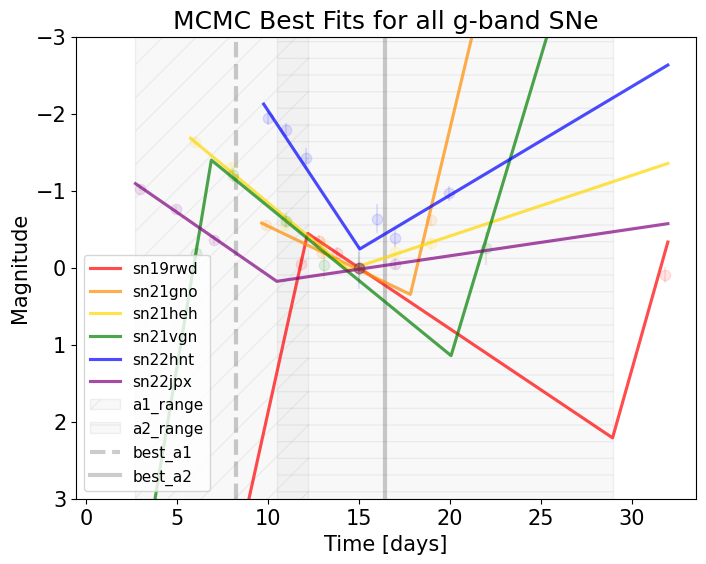

In [ ]:
x_plt = np.arange(1,32,0.01)
colors=['red', 'darkorange', 'gold', 'green', 'blue', 'purple']
ls = ['solid', 'dotted', 'dashed', 'dashdot', (5, (10, 3)), (0, (3, 5, 1, 5))]

a1s,a2s = [],[]
plt.figure(figsize=(8,6))
for i in range(len(all_fits_g)):
    best = np.array(all_fits_g[i]).T[0] #bestfit values
    lower_bound = np.array(all_fits_g[i]).T[0] - np.array(all_fits_g[i]).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(all_fits_g[i]).T[0] + np.array(all_fits_g[i]).T[2] #50th ptile + diff_84ptile
    a1s.append(best[-3])
    a2s.append(best[-2])
    
    #plotting mcmc results
    plt.plot(x_plt, np.array([model(best, v, r1=r1_g_bool[i], verbose=False) for v in x_plt]), c=colors[i], label=sn_names[i], alpha=0.7, linewidth=2.25)# linestyle=ls[i])
    lower_curve = np.array([model(lower_bound, v, r1=r1_g_bool[i], verbose=False) for v in x_plt])
    upper_curve = np.array([model(upper_bound, v, r1=r1_g_bool[i], verbose=False) for v in x_plt])
    # plt.fill_between(x_plt, lower_curve, upper_curve, color='lightgray', alpha=0.15)
    
    #plotting ztf data
    x,y,yerr = sub_sne_g[i][0], sub_sne_g[i][1], sub_sne_g[i][2]
    plt.errorbar(x, y, yerr, linestyle='', marker='.', color=colors[i], alpha=0.1, label='', markersize=15) #ztf errors

min_a1, med_a1, max_a1 = min(a1s), np.median(a1s), max(a1s)
min_a2, med_a2, max_a2 = min(a2s), np.median(a2s), max(a2s)
plt.axvspan(min_a1, max_a1, alpha=0.05, facecolor='gray', label='a1_range', edgecolor='black', hatch='/', zorder=0)
plt.axvspan(min_a2, max_a2, alpha=0.05, facecolor='gray', label='a2_range', edgecolor='black', hatch='-', zorder=0)
plt.axvline(med_a1,alpha=0.2, color='black', linestyle='dashed', linewidth=3, label='best_a1', zorder=1)
plt.axvline(med_a2,alpha=0.2, color='black', linestyle='solid', linewidth=3, label='best_a2', zorder=1)

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('MCMC Best Fits for all g-band SNe')
plt.ylim(3,-3)
plt.legend(fontsize=11)

plt.savefig('./figures/all_mcmc_fits_g_a12err.png')
# plt.savefig('./figures/all_mcmc_fits_g_errband.png')

In [ ]:
x_plt = np.arange(1,32,0.01)
colors=['red', 'darkorange', 'gold', 'green', 'blue', 'purple']
ls = ['solid', 'dotted', 'dashed', 'dashdot', (5, (10, 3)), (0, (3, 5, 1, 5))]

a1s,a2s = [],[]
plt.figure(figsize=(8,6))
for i in range(len(all_fits_r)):
    best = np.array(all_fits_r[i]).T[0] #bestfit values
    lower_bound = np.array(all_fits_r[i]).T[0] - np.array(all_fits_r[i]).T[1] #50th ptile - diff_16ptile
    upper_bound = np.array(all_fits_r[i]).T[0] + np.array(all_fits_r[i]).T[2] #50th ptile + diff_84ptile
    a1s.append(best[-3])
    a2s.append(best[-2])
    
    #plotting mcmc results
    plt.plot(x_plt, np.array([model(best, v, r1=r1_r_bool[i], verbose=False) for v in x_plt]), c=colors[i], label=sn_names[i], alpha=0.7, linewidth=2.25)# linestyle=ls[i])
    lower_curve = np.array([model(lower_bound, v, r1=r1_r_bool[i], verbose=False) for v in x_plt])
    upper_curve = np.array([model(upper_bound, v, r1=r1_r_bool[i], verbose=False) for v in x_plt])
    # plt.fill_between(x_plt, lower_curve, upper_curve, color='lightgray', alpha=0.15)

    #plotting ztf data
    x,y,yerr = sub_sne_r[i][0], sub_sne_r[i][1], sub_sne_r[i][2]
    plt.errorbar(x, y, yerr, linestyle='', marker='.', color=colors[i], alpha=0.1, label='', markersize=15) #ztf errors, 

min_a1, med_a1, max_a1 = min(a1s), np.median(a1s), max(a1s)
min_a2, med_a2, max_a2 = min(a2s), np.median(a2s), max(a2s)
plt.axvspan(min_a1, max_a1, alpha=0.05, facecolor='gray', label='a1_range', edgecolor='black', hatch='/', zorder=0)
plt.axvspan(min_a2, max_a2, alpha=0.05, facecolor='gray', label='a2_range', edgecolor='black', hatch='-', zorder=0)
plt.axvline(med_a1,alpha=0.2, color='black', linestyle='dashed', linewidth=3, label='best_a1', zorder=1)
plt.axvline(med_a2,alpha=0.2, color='black', linestyle='solid', linewidth=3, label='best_a2', zorder=1)

plt.xlabel('Time [days]')
plt.ylabel('Magnitude')
plt.title('MCMC Best Fits for all r-band SNe')
plt.ylim(3,-3)
plt.legend(fontsize=11)

plt.savefig('./figures/all_mcmc_fits_r_a12err.png')
# plt.savefig('./figures/all_mcmc_fits_r_errband.png')

ValueError: min() arg is an empty sequence

<Figure size 800x600 with 0 Axes>